[View in Colaboratory](https://colab.research.google.com/github/hkaur2001/Week3_public/blob/master/NEWDATA_word2vector_latest_TFIDF_model.ipynb)

### **Imports**

In [0]:
! pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import sys
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import os

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
### lists the files in the folder 
file_list = drive.ListFile({'q': "'18sX8Dymv_AAEaY7mJxbmh_LjljD8oRwK' in parents and trashed=false"}).GetList() ## long string in the url of folder
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Data_2000_2, id: 1sIgmLvS0iJUgxvjKLBjwSQHoY9P-YsyL
title: data_3200.csv, id: 1jOH6hepK10-rdzxv0k6A3_svS4H9T48H
title: Data Vector CLEAN, id: 1uCZsgzLhptTs56JNz_C4lbrbLQvFOAwW
title: Data_2000_1, id: 11fiGbqwp_ekLtPBhuVkjYO3-1RWWr91Y
title: bully_victim1.csv, id: 1ngNQ_sLWIAnN7scAxJl4-y8QZB_soeTQ
title: bully_victim.csv, id: 1qud97IBO3rkLkmDJTi-Y8U--waH7v6tb
title: data_categorical_multi.csv, id: 10qfXUcLUW4GPBM1ra3_cRBpnW9ltQEh-
title: data_categorical_binary.csv, id: 1Mn0cT-De4mq-9gJ7J2s201jvZQ1bWNGK
title: formatted, id: 1cuN_xbf0pz7t1TY6t8vskoVa6SXXWQK7
title: glove.6B.100d.txt, id: 1-FOMH_1xZcjtYo1uW3_2BwozqHFC-dZb
title: Data WITH b', id: 1yDewPt327TxTrKCvuCIpHNyigDMaKPyv
title: glove.6B.zip, id: 1tuFKpS8F1lhnaemAYi_w498Vli6WGuKP
title: data_tweet_clean_500_stop.csv, id: 1bUddQJ0LejpEROhpWmMtYYSoXvR2q4pc
title: Data Cleaning, id: 1JsVnP9kago0ipdSqtX7txLQWMTwSPZ3X
title: data_Tweet_clean.csv, id: 1FNa4-dHR6aEeunRIwMnaBBacSlCHZOsW
title: Medication_1, id: 1yvcgD5F6on7s9gwS56G

In [0]:
### download the file 
file_downloaded = drive.CreateFile({'id': '1jEg_1SJXvTWR5VYYYTRomoe2YaCPFBqm'})
file_downloaded.GetContentFile('data_2000_1_VEC.csv')

df_data = pd.read_csv('data_2000_1_VEC.csv', dtype = str)
df_data.head(15)
#type(df_data['Text'][0])




,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text
0,107688644067856384,185389094,1,self-disclosure,other,n,defender,empathy,i herd that you got bullied when you was 6 yea...
1,102206417217392640,226320672,0,NaN,NaN,NaN,NaN,NaN,bullying o gesto mais e que um ser humano pode
2,102779484725448704,297557032,0,NaN,NaN,NaN,NaN,NaN,the bully at school goes high tech part 1 the ...
3,108676972149874688,157724561,0,NaN,NaN,NaN,NaN,NaN,esse bullying haha
4,106590106873372672,62179998,0,NaN,NaN,NaN,NaN,NaN,eu e o mancha o dia pra bullying com a
5,109034091743154176,177913822,0,NaN,NaN,NaN,NaN,NaN,hello since when i got bully people never phys...
6,102533497637437441,70412906,1,report,other,n,reporter,none,for those keeping score at home cousin who jus...
7,103679008855691264,11363462,0,NaN,NaN,NaN,NaN,NaN,better anti bullying ad slogans hey bullies si...
8,105202476927549441,293593896,0,NaN,NaN,NaN,NaN,NaN,lo kaga dia juga gue kira pada si sq itu ayo t...
9,107278521805713408,150964152,0,NaN,NaN,NaN,NaN,NaN,bully iam uda di tpi gk bls


Formating data

In [0]:
df_data['Author_Role'].unique()

array(['defender', nan, 'reporter', 'victim', 'bully', 'accuser',
       'reinforcer', 'assistant'], dtype=object)

In [0]:
import re 
def format_class_labels(df):
    
    # regex the weird class labels out
    regex_pattern = ( "\.\|\d+")

    for index, row in df.iterrows():

        # substitute instances of our regex_pattern for an empty string
        new_class = re.sub(regex_pattern, '', row['Bullying_Traces?'])
        df.loc[index,'Bullying_Traces?']=new_class
    
    # set all negative class labels to 0, all others to 1

    df['Bullying_Traces?'] = df['Bullying_Traces?'].replace('n', 0)                    
    df['Bullying_Traces?'] = df['Bullying_Traces?'].replace('y', 1)     
    
    return df

##fomatted the Bullying_Traces? column to 1 for 'y' and 0 for 'n'
data_train = format_class_labels(df_data)
data_train.head()

,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text
0,107688644067856384,185389094,1,self-disclosure,other,n,defender,empathy,i herd that you got bullied when you was 6 yea...
1,102206417217392640,226320672,0,NaN,NaN,NaN,NaN,NaN,bullying o gesto mais e que um ser humano pode
2,102779484725448704,297557032,0,NaN,NaN,NaN,NaN,NaN,the bully at school goes high tech part 1 the ...
3,108676972149874688,157724561,0,NaN,NaN,NaN,NaN,NaN,esse bullying haha
4,106590106873372672,62179998,0,NaN,NaN,NaN,NaN,NaN,eu e o mancha o dia pra bullying com a


In [0]:
data_train['Bullying_Traces?']=pd.to_numeric(data_train['Bullying_Traces?'])

In [0]:
type(data_train['Bullying_Traces?'][0])

numpy.int64

In [0]:
# words = []
# for i in range(data_train.shape[0]):
#   words.append(data_train['Text'][i].split(" "))

#   #every vector inside of the array has 100 

In [0]:
# len(words[3])

In [0]:
# max_words = len(data_train['Text'][0])
# for i in range(data_train.shape[0]):
#   if len(data_train['Text'][i]) > max_words:
#     max_words = len(data_train['Text'][i])

# max_words

In [0]:
to_Vec.shape

(2080, 31, 100)

# **WORD2VEC TRIAL**

In [0]:
!pip install -U gensim


Requirement already up-to-date: gensim in /usr/local/lib/python2.7/dist-packages (3.5.0)


In [0]:
### authentication -- run once 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
### lists the files in the folder 
file_list = drive.ListFile({'q': "'18sX8Dymv_AAEaY7mJxbmh_LjljD8oRwK' in parents and trashed=false"}).GetList() ## long string in the url of folder
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Data_2000_2, id: 1sIgmLvS0iJUgxvjKLBjwSQHoY9P-YsyL
title: data_3200.csv, id: 1jOH6hepK10-rdzxv0k6A3_svS4H9T48H
title: Data Vector CLEAN, id: 1uCZsgzLhptTs56JNz_C4lbrbLQvFOAwW
title: Data_2000_1, id: 11fiGbqwp_ekLtPBhuVkjYO3-1RWWr91Y
title: bully_victim1.csv, id: 1ngNQ_sLWIAnN7scAxJl4-y8QZB_soeTQ
title: bully_victim.csv, id: 1qud97IBO3rkLkmDJTi-Y8U--waH7v6tb
title: data_categorical_multi.csv, id: 10qfXUcLUW4GPBM1ra3_cRBpnW9ltQEh-
title: data_categorical_binary.csv, id: 1Mn0cT-De4mq-9gJ7J2s201jvZQ1bWNGK
title: formatted, id: 1cuN_xbf0pz7t1TY6t8vskoVa6SXXWQK7
title: glove.6B.100d.txt, id: 1-FOMH_1xZcjtYo1uW3_2BwozqHFC-dZb
title: Data WITH b', id: 1yDewPt327TxTrKCvuCIpHNyigDMaKPyv
title: glove.6B.zip, id: 1tuFKpS8F1lhnaemAYi_w498Vli6WGuKP
title: data_tweet_clean_500_stop.csv, id: 1bUddQJ0LejpEROhpWmMtYYSoXvR2q4pc
title: Data Cleaning, id: 1JsVnP9kago0ipdSqtX7txLQWMTwSPZ3X
title: data_Tweet_clean.csv, id: 1FNa4-dHR6aEeunRIwMnaBBacSlCHZOsW
title: Medication_1, id: 1yvcgD5F6on7s9gwS56G

In [0]:
### download the file 


file_downloaded = drive.CreateFile({'id': '1-FOMH_1xZcjtYo1uW3_2BwozqHFC-dZb'})
file_downloaded.GetContentFile('glove.6B.100d.txt')

#type(df_data['Text'][0])

In [0]:
import pickle

data_file= ('glove.6B.100d.txt')
pickle.dump( data_file, open( "save.p", "wb" ) )

data_file = pickle.load( open( "save.p", "rb" ) )

In [0]:
import gensim


from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [0]:


from gensim.models import KeyedVectors
from gensim import models
from gensim.models import Word2Vec, KeyedVectors


# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'


kv = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = kv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[(u'queen', 0.7698541283607483)]


In [0]:
kv['bully']

array([ 0.46402  ,  0.33489  ,  0.71472  , -0.40918  , -1.1902   ,
        0.84827  , -0.66481  , -0.46921  ,  0.55256  ,  0.23158  ,
       -0.55591  , -0.61517  , -0.27387  , -0.0041352,  0.18803  ,
        0.77771  , -0.015384 ,  0.31946  , -0.49973  ,  0.3949   ,
        0.2143   ,  0.098468 ,  0.16711  , -0.46618  ,  0.098281 ,
        0.52806  , -0.70858  , -0.072936 , -0.16317  ,  0.78392  ,
        0.73704  ,  0.56865  ,  0.53089  ,  0.55465  ,  0.58625  ,
        0.5025   , -0.65786  , -0.65226  ,  0.4872   , -0.15267  ,
       -0.91033  ,  0.053135 , -0.41061  , -0.51095  , -0.36981  ,
        0.19363  ,  0.14067  ,  0.039983 , -0.21934  , -0.18373  ,
       -1.5105   , -0.025053 , -0.40377  ,  0.59923  ,  0.050316 ,
       -0.89414  , -0.15657  , -0.2641   , -0.47892  , -0.72455  ,
        0.061247 , -0.01786  , -0.1041   ,  0.20226  ,  0.14936  ,
       -0.57338  ,  0.41051  ,  0.25484  ,  0.22755  ,  0.21723  ,
       -0.073985 , -0.41368  , -0.42756  , -0.50512  , -0.6308

In [0]:
### creating the array for the vectors
#to_Vec has the big data of words
to_Vec = np.zeros((df_data.shape[0], 31, 100))

for i in range(df_data.shape[0]):
  s = df_data['Text'][i]
  words = s.split()
  
  npArr = np.zeros((31, 100)) ## shape of the numpy 
  for j in range(len(words)):
    npArr[j] = kv[words[j]]
  to_Vec[i] = npArr

In [0]:
#model.build_vocab([["bully", "world"]], update=True)

#model.train([["hello", "world"]], total_examples=1, epochs=1)

In [0]:
#sentences = X_train
#print(type(Word2Vec))
#model_2= Word2Vec("data_2000_1.csv")
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#model_2= word2vec.Word2Vec(sentences, iter=10, min_count=10, size=300, workers=4)

In [0]:
#### Initialize a model
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [0]:
### It also means you can continue training the model later

model = Word2Vec.load("word2vec.model")

model.build_vocab([["bully", "world"]], update=True)

model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

In [0]:
vector = model.wv['bully']
vector

array([ 0.00190809,  0.00408922,  0.00077869,  0.00173799,  0.00405161,
       -0.00015257,  0.00288971, -0.00145882, -0.00368313, -0.00176414,
        0.00425356, -0.00087996, -0.00272697,  0.00360487,  0.00109072,
       -0.00482104, -0.00325567,  0.00233259, -0.00420405, -0.00342001,
       -0.00442091,  0.00315547, -0.00417632, -0.0026977 , -0.00266447,
       -0.00041663, -0.00160667, -0.00334739, -0.00357138,  0.00494552,
        0.00424215, -0.00432753,  0.00187922, -0.00434171, -0.00300552,
       -0.00209886,  0.003476  ,  0.00078988,  0.00154017,  0.004165  ,
        0.00360895,  0.00157731,  0.00286988,  0.00141052,  0.00241883,
        0.00387185,  0.00014089, -0.00196018, -0.00360881,  0.00061325,
        0.00450235, -0.00490358,  0.00483352,  0.0030051 , -0.00323944,
        0.00016441,  0.00372752, -0.00208207,  0.00022257, -0.00417535,
        0.00083439,  0.00046077,  0.0033144 ,  0.00120572,  0.0042862 ,
        0.00101308,  0.00160899,  0.00379932,  0.00318086,  0.00

In [0]:
data_train['Text'].shape

(2080,)

# **CNN**

In [0]:
##train and test split
x_train1, x_test, y_train1, y_test = train_test_split(to_Vec, data_train['Bullying_Traces?'], test_size = 0.2)
#X_train


In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.2)

In [0]:
#from  sklearn.cross_validationsklearn  import train_test_split
from sklearn.model_selection import train_test_split
SEED = 2000



#X_train, X_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.02, random_state=SEED)
#X_validation, X_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [0]:

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant


In [0]:
# # from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# tokenizer = Tokenizer(num_words=100000)
# tokenizer.fit_on_texts(x_train)
# sequences = tokenizer.texts_to_sequences(x_train)

In [0]:
'''''BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'data_2000_1')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 2000
EMBEDDING_DIM = 100
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

        
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)




# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_val, y_val))
  '''

"''BASE_DIR = ''\nGLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')\nTEXT_DATA_DIR = os.path.join(BASE_DIR, 'data_2000_1')\nMAX_SEQUENCE_LENGTH = 1000\nMAX_NUM_WORDS = 2000\nEMBEDDING_DIM = 100\n# finally, vectorize the text samples into a 2D integer tensor\ntokenizer = Tokenizer(num_words=MAX_NUM_WORDS)\ntokenizer.fit_on_texts(texts)\nsequences = tokenizer.texts_to_sequences(texts)\n\nword_index = tokenizer.word_index\nprint('Found %s unique tokens.' % len(word_index))\n\ndata = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)\n\n        \n# finally, vectorize the text samples into a 2D integer tensor\ntokenizer = Tokenizer(num_words=MAX_NUM_WORDS)\ntokenizer.fit_on_texts(texts)\nsequences = tokenizer.texts_to_sequences(texts)\n\nword_index = tokenizer.word_index\nprint('Found %s unique tokens.' % len(word_index))\n\ndata = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)\n\n\n\n\n# train a 1D convnet with global maxpooling\nsequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dt

In [0]:
kv.wv['bully']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 0.46402  ,  0.33489  ,  0.71472  , -0.40918  , -1.1902   ,
        0.84827  , -0.66481  , -0.46921  ,  0.55256  ,  0.23158  ,
       -0.55591  , -0.61517  , -0.27387  , -0.0041352,  0.18803  ,
        0.77771  , -0.015384 ,  0.31946  , -0.49973  ,  0.3949   ,
        0.2143   ,  0.098468 ,  0.16711  , -0.46618  ,  0.098281 ,
        0.52806  , -0.70858  , -0.072936 , -0.16317  ,  0.78392  ,
        0.73704  ,  0.56865  ,  0.53089  ,  0.55465  ,  0.58625  ,
        0.5025   , -0.65786  , -0.65226  ,  0.4872   , -0.15267  ,
       -0.91033  ,  0.053135 , -0.41061  , -0.51095  , -0.36981  ,
        0.19363  ,  0.14067  ,  0.039983 , -0.21934  , -0.18373  ,
       -1.5105   , -0.025053 , -0.40377  ,  0.59923  ,  0.050316 ,
       -0.89414  , -0.15657  , -0.2641   , -0.47892  , -0.72455  ,
        0.061247 , -0.01786  , -0.1041   ,  0.20226  ,  0.14936  ,
       -0.57338  ,  0.41051  ,  0.25484  ,  0.22755  ,  0.21723  ,
       -0.073985 , -0.41368  , -0.42756  , -0.50512  , -0.6308

In [0]:
from keras.models import Sequential

clf = Sequential()
clf.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', input_shape=x_train.shape[1:], strides=1))
clf.add(GlobalMaxPooling1D())
clf.add(Dense(256, activation='relu'))
clf.add(Dense(256, activation='sigmoid'))
clf.add(Dense(2, activation='softmax'))
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# clf.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32, verbose=2)




In [0]:
from tensorflow.keras.utils import to_categorical

y_val1 = to_categorical(y_val)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [0]:
history = clf.fit(x_train, y_train1, validation_data=(x_val, y_val1), epochs=100, batch_size=32, verbose=2)

Train on 1331 samples, validate on 333 samples
Epoch 1/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 0.8764 - val_acc: 0.8348
Epoch 2/100
 - 1s - loss: 0.0027 - acc: 0.9985 - val_loss: 0.9714 - val_acc: 0.8258
Epoch 3/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 0.9933 - val_acc: 0.8288
Epoch 4/100
 - 1s - loss: 0.0024 - acc: 0.9970 - val_loss: 0.9736 - val_acc: 0.8198
Epoch 5/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 0.9133 - val_acc: 0.8348
Epoch 6/100
 - 1s - loss: 0.0029 - acc: 0.9970 - val_loss: 0.9026 - val_acc: 0.8348
Epoch 7/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 0.9992 - val_acc: 0.8288
Epoch 8/100
 - 1s - loss: 0.0023 - acc: 0.9977 - val_loss: 0.9561 - val_acc: 0.8318
Epoch 9/100
 - 1s - loss: 0.0025 - acc: 0.9985 - val_loss: 0.9207 - val_acc: 0.8348
Epoch 10/100
 - 1s - loss: 0.0023 - acc: 0.9977 - val_loss: 0.9707 - val_acc: 0.8288
Epoch 11/100
 - 1s - loss: 0.0023 - acc: 0.9985 - val_loss: 0.9949 - val_acc: 0.8258
Epoch 12/100
 - 1s - loss: 

 - 1s - loss: 0.0027 - acc: 0.9970 - val_loss: 1.1222 - val_acc: 0.8288
Epoch 35/100
 - 1s - loss: 0.0023 - acc: 0.9977 - val_loss: 1.0688 - val_acc: 0.8318
Epoch 36/100
 - 1s - loss: 0.0024 - acc: 0.9977 - val_loss: 1.0678 - val_acc: 0.8318
Epoch 37/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 1.1556 - val_acc: 0.8258
Epoch 38/100
 - 1s - loss: 0.0023 - acc: 0.9977 - val_loss: 1.0872 - val_acc: 0.8318
Epoch 39/100
 - 1s - loss: 0.0024 - acc: 0.9970 - val_loss: 1.1030 - val_acc: 0.8288
Epoch 40/100
 - 1s - loss: 0.0025 - acc: 0.9970 - val_loss: 1.1157 - val_acc: 0.8288
Epoch 41/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 1.1750 - val_acc: 0.8228
Epoch 42/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 1.0923 - val_acc: 0.8318
Epoch 43/100
 - 1s - loss: 0.0022 - acc: 0.9977 - val_loss: 1.1424 - val_acc: 0.8288
Epoch 44/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 1.1122 - val_acc: 0.8318
Epoch 45/100
 - 1s - loss: 0.0024 - acc: 0.9977 - val_loss: 1.1811 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.0025 - acc: 0.9970 - val_loss: 1.2238 - val_acc: 0.8228
Epoch 69/100
 - 1s - loss: 0.0029 - acc: 0.9985 - val_loss: 1.1708 - val_acc: 0.8318
Epoch 70/100
 - 1s - loss: 0.0023 - acc: 0.9985 - val_loss: 1.2462 - val_acc: 0.8288
Epoch 71/100
 - 1s - loss: 0.0024 - acc: 0.9977 - val_loss: 1.2057 - val_acc: 0.8318
Epoch 72/100
 - 1s - loss: 0.0023 - acc: 0.9977 - val_loss: 1.2225 - val_acc: 0.8288
Epoch 73/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 1.2042 - val_acc: 0.8348
Epoch 74/100
 - 1s - loss: 0.0026 - acc: 0.9977 - val_loss: 1.1736 - val_acc: 0.8318
Epoch 75/100
 - 1s - loss: 0.0030 - acc: 0.9985 - val_loss: 1.3434 - val_acc: 0.8198
Epoch 76/100
 - 1s - loss: 0.0025 - acc: 0.9977 - val_loss: 1.2146 - val_acc: 0.8348
Epoch 77/100
 - 1s - loss: 0.0024 - acc: 0.9977 - val_loss: 1.2403 - val_acc: 0.8288
Epoch 78/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 1.3073 - val_acc: 0.8228
Epoch 79/100
 - 1s - loss: 0.0024 - acc: 0.9985 - val_loss: 1.197

In [0]:
t = pd.Series.tolist(y_val)

In [0]:
y_pred = clf.predict_proba(x_val)

In [0]:
y_val_pred = [np.argmax(y) for y in y_pred]
y_val_pred

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [0]:
# # # confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t, y_val_pred)
cm

array([[233,  19],
       [ 39,  42]])

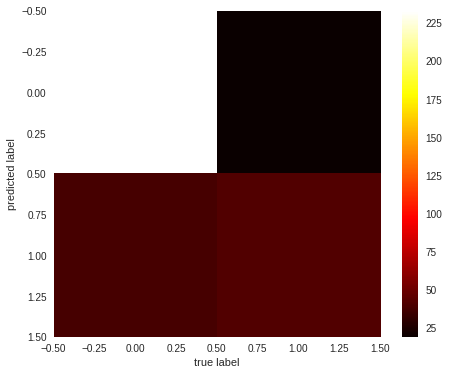

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [0]:
##ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(t, y_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9060356652949245

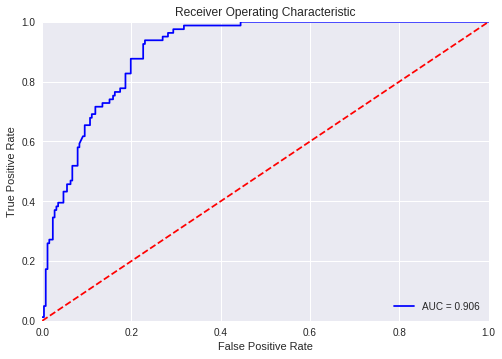

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

['acc', 'loss', 'val_acc', 'val_loss']


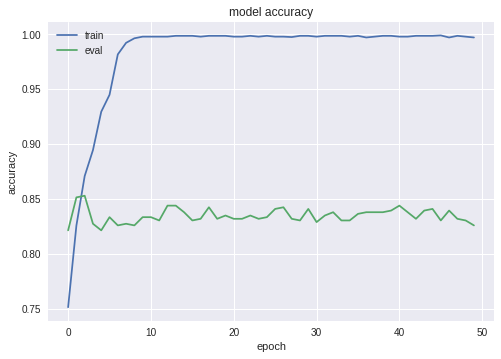

In [0]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()